#**Random Forest**

**Dataset Description:**

Use the Glass dataset and apply the Random forest model.

**1. Exploratory Data Analysis (EDA):**

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

**2: Data Visualization:**

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

**3: Data Preprocessing**

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

**4: Random Forest Model Implementation**
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

**5: Bagging and Boosting Methods**
Apply the Bagging and Boosting methods and compare the results.


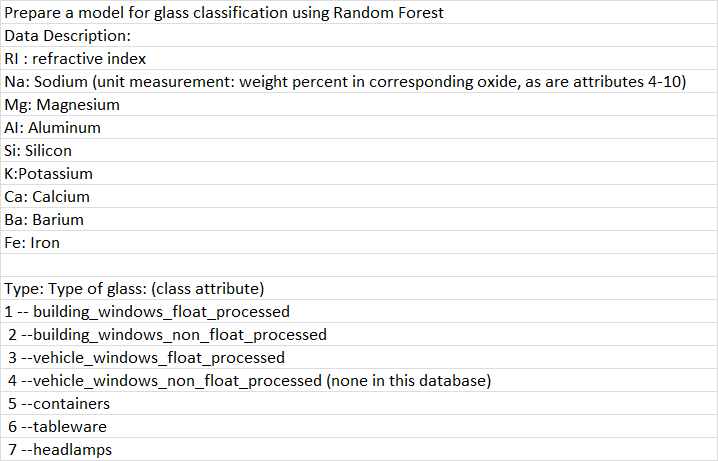

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Step 1: Exploratory Data Analysis (EDA)**

In [ ]:
# Load the dataset from the Excel file
file_path = r'/content/glass.xlsx'
glass_df = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names to ensure we are reading the correct sheet
print("Sheet names:", glass_df.keys())

# Load the specific sheet
glass_df = pd.read_excel(file_path,sheet_name='glass')  # Replace 'Sheet1' with the correct sheet name if different

# Display the first few rows of the DataFrame
print(glass_df.head())

Sheet names: dict_keys(['Description', 'glass'])
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [ ]:
# Display the first few rows of the dataset
print(glass_df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [ ]:
# Display the summary statistics of the dataset
print(glass_df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [ ]:
# Check for missing values
print(glass_df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


**No missing values**

In [ ]:
# Check the data types
print(glass_df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [ ]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass_df.shape

(214, 10)

In [ ]:
glass_df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
glass_df.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [ ]:
#To identify outliers
outliers = {}
numerical_columns = glass_df.select_dtypes(include=[np.number]).columns

for col in numerical_columns: # Iterate over the Index object directly
    Q1 = np.quantile(glass_df[col], 0.25)
    Q3 = np.quantile(glass_df[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = glass_df[(glass_df[col] < lower_bound) | (glass_df[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")

Outliers in RI:
47     1.52667
50     1.52320
56     1.51215
103    1.52725
104    1.52410
105    1.52475
106    1.53125
107    1.53393
110    1.52664
111    1.52739
112    1.52777
131    1.52614
170    1.52369
184    1.51115
185    1.51131
187    1.52315
189    1.52365
Name: RI, dtype: float64

Outliers in Na:
105    11.45
106    10.73
110    11.23
111    11.02
166    11.03
184    17.38
189    15.79
Name: Na, dtype: float64

No outliers in Mg

Outliers in Al:
21     0.29
38     0.47
39     0.47
50     0.51
163    3.50
171    3.04
172    3.02
184    0.34
191    2.38
192    2.79
195    2.68
196    2.54
197    2.34
198    2.66
199    2.51
202    2.42
208    2.74
209    2.88
Name: Al, dtype: float64

Outliers in Si:
103    70.57
106    69.81
107    70.16
109    74.45
163    69.89
171    70.48
172    70.70
180    74.55
184    75.41
188    70.26
189    70.43
201    75.18
Name: Si, dtype: float64

Outliers in K:
163    1.68
171    6.21
172    6.21
185    1.76
186    1.46
201    2.70
207    1

In [ ]:
# Define a function to cap outliers
def cap_outliers(series):
    lower_bound = series.quantile(0.05)
    upper_bound = series.quantile(0.95)
    return np.clip(series, lower_bound, upper_bound)

# Define a function to impute outliers with the median
def impute_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = series.median()
    return np.where((series < lower_bound) | (series > upper_bound), median, series)


In [ ]:
# Apply capping and imputation based on the suggested approach
glass_df['RI'] = cap_outliers(glass_df['RI'])
glass_df['Na'] = cap_outliers(glass_df['Na'])
glass_df['Al'] = impute_outliers(glass_df['Al'])
glass_df['Si'] = cap_outliers(glass_df['Si'])
glass_df['K'] = impute_outliers(glass_df['K'])
glass_df['Ca'] = impute_outliers(glass_df['Ca'])
glass_df['Ba'] = cap_outliers(glass_df['Ba'])
glass_df['Fe'] = impute_outliers(glass_df['Fe'])

In [ ]:
# Convert the modified data back to a DataFrame
glass_df = pd.DataFrame(glass_df)

In [ ]:
print(glass_df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518279   13.427353    2.684533    1.383692   72.658446    0.415070   
std      0.002302    0.666491    1.442408    0.338015    0.594083    0.259124   
min      1.515401   12.415000    0.000000    0.560000   71.315000    0.000000   
25%      1.516522   12.907500    2.115000    1.202500   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.552500   
75%      1.519157   13.825000    3.600000    1.560000   73.087500    0.600000   
max      1.523664   14.853500    4.490000    2.270000   73.517500    1.100000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.644393    0.156168    0.038832    2.780374  
std      0.587123    0.414816    0.071359    2.103739  
min      6.930000    0.000000    0.000000    1

**Consistency in Refractive Index (RI):** The Refractive Index (RI) values are tightly clustered, with a small standard deviation of 0.003, indicating that most glass samples have a similar RI.

**Sodium (Na) Variability:** Sodium (Na) content shows some variation, with a standard deviation of 0.816 and a range from 10.73 to 17.38, suggesting different types of glass compositions.

**High Variation in Magnesium (Mg) and Potassium (K):** Magnesium (Mg) has a wide range of values, from 0.0 to 4.49, and a significant standard deviation, indicating its presence varies greatly across samples. Potassium (K) also shows variability with values ranging from 0.0 to 6.21.

**Calcium (Ca) Dominance:** Calcium (Ca) is present in relatively high amounts, with a mean of 8.96, and is consistent across samples, as indicated by a standard deviation of 1.42.

**Presence of Barium (Ba) and Iron (Fe):** Both Barium (Ba) and Iron (Fe) have low mean values (0.175 and 0.057 respectively) and are not present in all samples, as indicated by their minimum values of 0.0.

**Type Distribution:** The "Type" attribute indicates the classification of glass types, with values ranging from 1 to 7, showing that the dataset includes a variety of glass types, though the standard deviation of 2.1 suggests that the distribution of types is uneven.

**Step 2: Data Visualization**

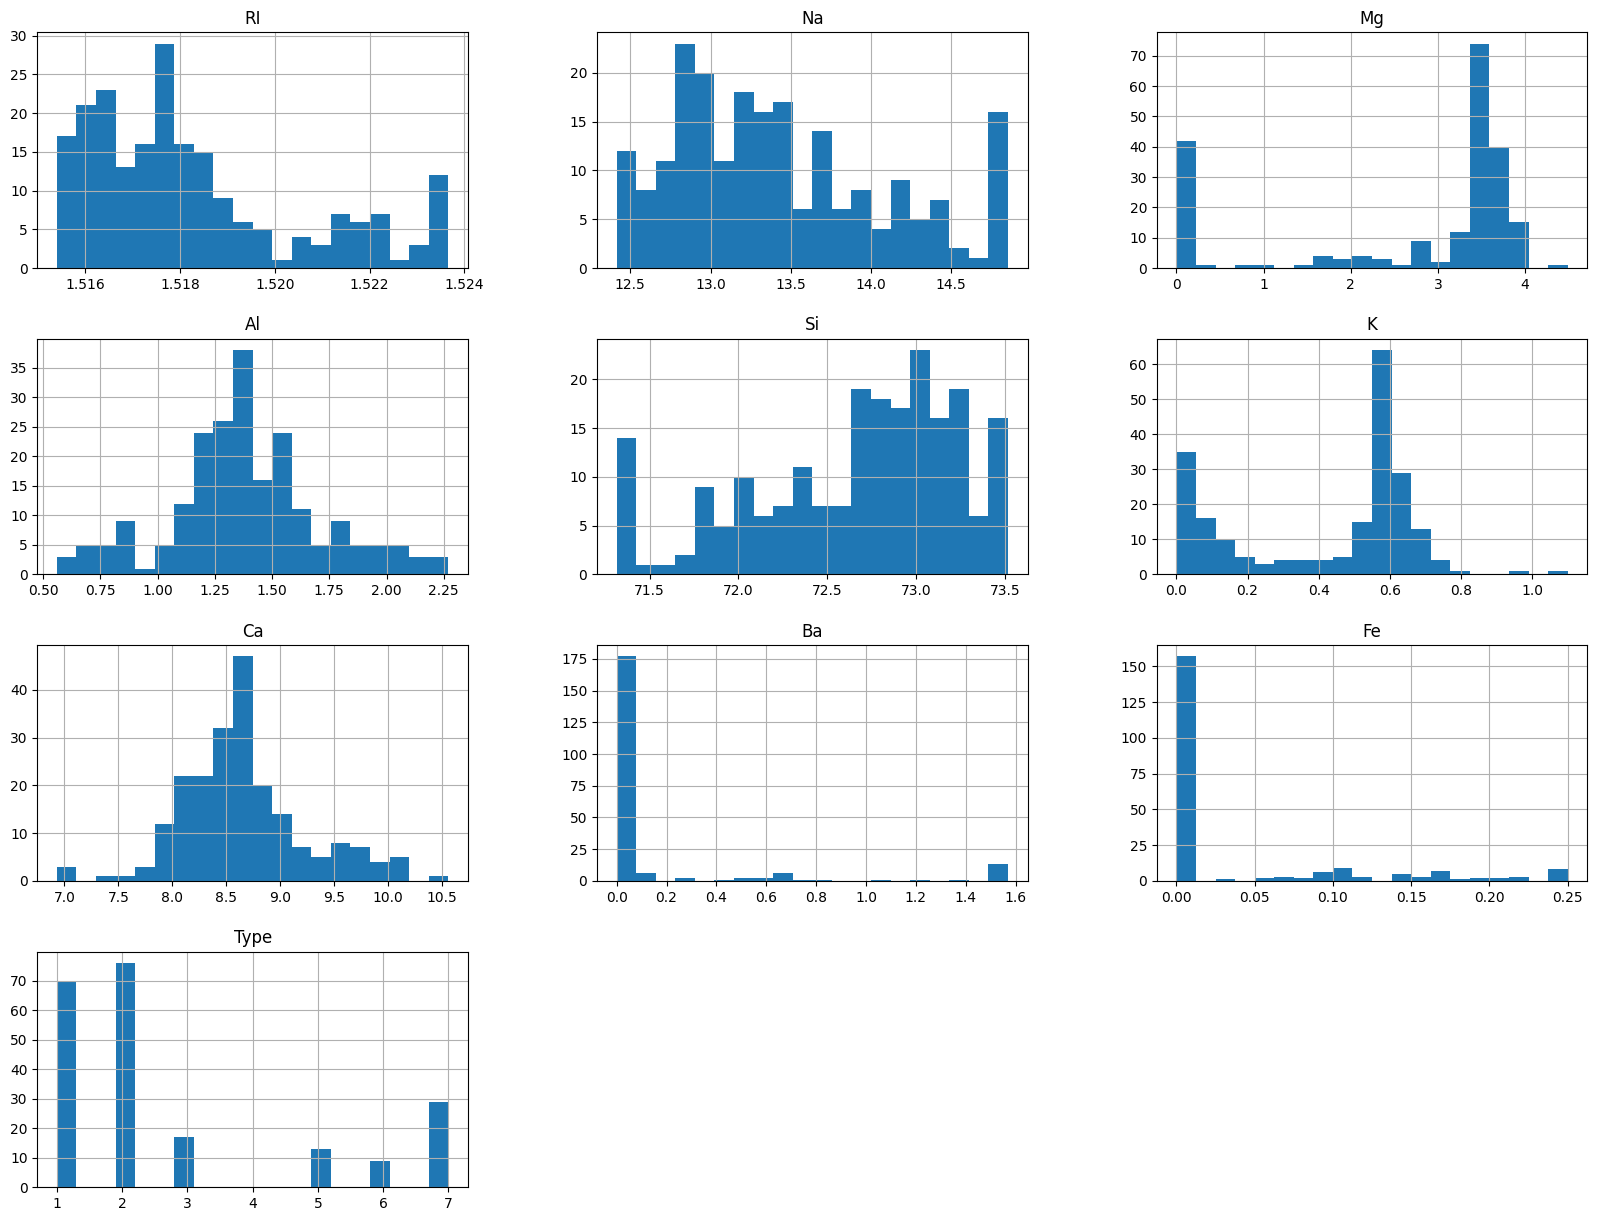

In [ ]:
# Histograms for each feature
glass_df.hist(bins=20, figsize=(20,15))
plt.show()

**Refractive Index (RI):** The distribution is slightly skewed to the right with a concentration of samples around 1.517 to 1.518.

**Sodium (Na):** Sodium levels show a varied distribution, with peaks around 12.5 to 13 and another significant peak near 14.5.

**Magnesium (Mg):** Magnesium has a highly skewed distribution with many samples having values around 3, while others are close to 0.

**Aluminum (Al):** Aluminum shows a fairly normal distribution, centered around 1.25, indicating most samples have similar levels.

**Silicon (Si):** Silicon has a bimodal distribution with two peaks, one around 72 and another around 73, showing some variation across samples.

**Potassium (K):** Potassium displays a skewed distribution with a peak around 0.5 and some outliers extending beyond 1.

**Calcium (Ca):** Calcium has a normal distribution centered around 8.5, indicating consistency across samples.

**Barium (Ba):** Most samples have a Barium content of 0, but there are a few with higher values, up to 1.6.

**Iron (Fe):** Iron content is heavily skewed towards 0, with a few samples having slightly higher values.

**Glass Type:** The glass type distribution is uneven, with certain types (like Type 1 and Type 2) being more frequent than others.

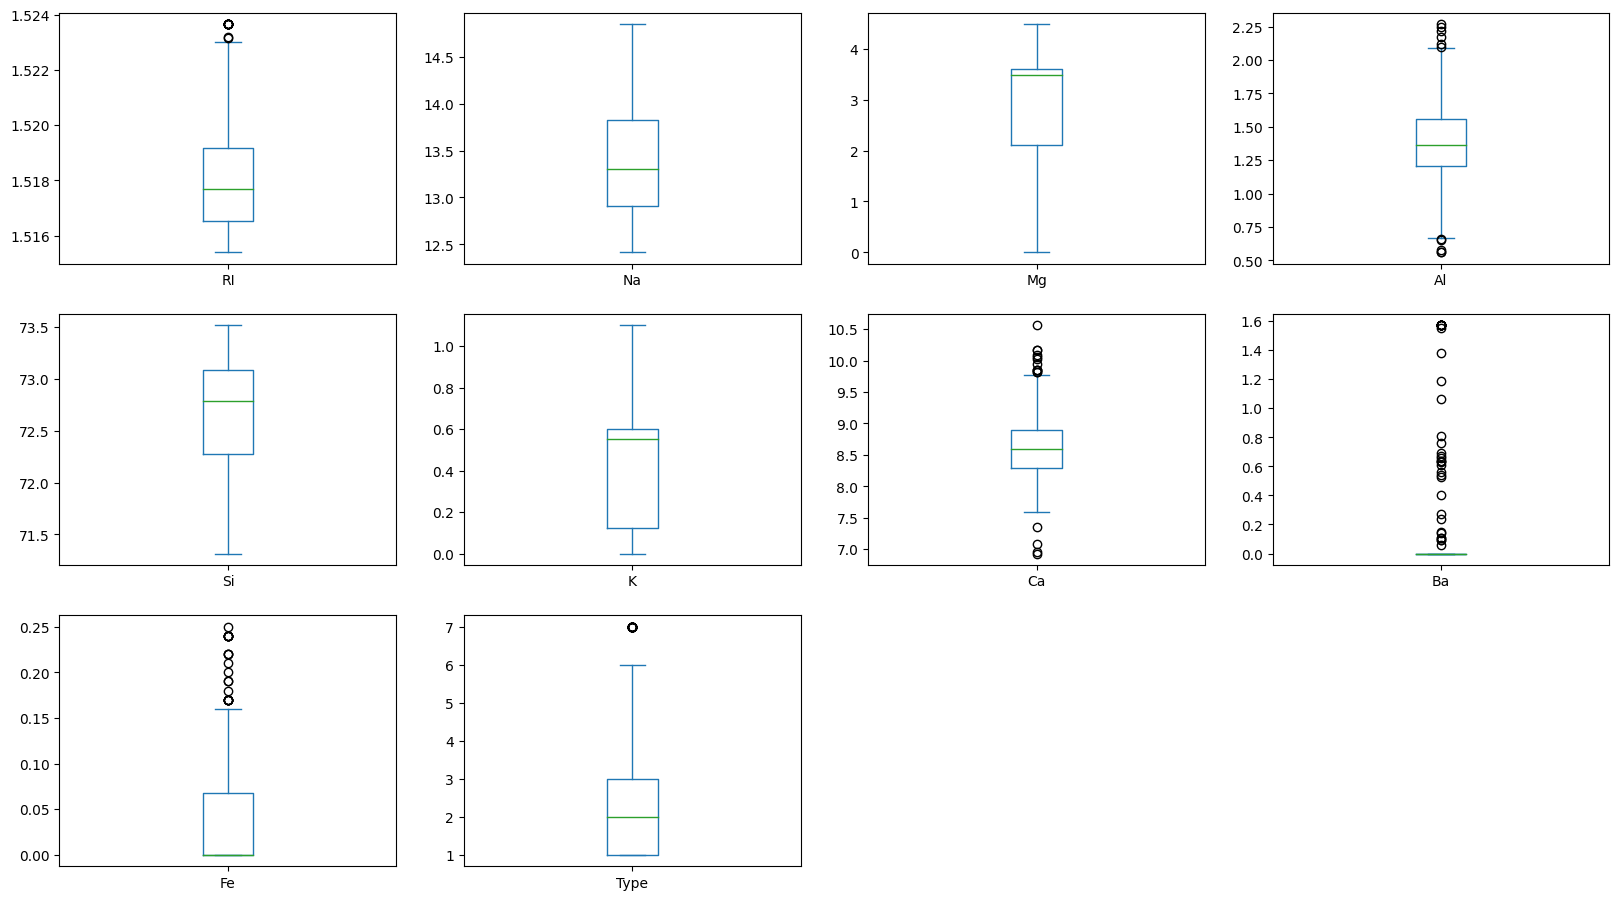

In [ ]:
# Box plots to visualize outliers
glass_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

- **RI (Refractive Index):** The values are tightly clustered with a few outliers on the higher side, indicating a generally consistent refractive index among the samples.
- **Na (Sodium):** The sodium content has a relatively broad spread with no outliers, showing some variability among the samples.
- **Mg (Magnesium):** The magnesium content displays a wide range, indicating significant variability in this attribute, with no apparent outliers.
- **Al (Aluminum):** The aluminum levels are fairly concentrated with some outliers on the higher end, suggesting a few samples have unusually high aluminum content.
- **Si (Silicon):** The silicon content is evenly distributed with no outliers, indicating consistency across the samples.
- **K (Potassium):** The potassium levels show a moderate spread with no outliers, indicating variation in this attribute but within expected limits.
- **Ca (Calcium):** Calcium shows a few outliers on both the higher and lower ends, indicating some extreme values in the dataset.
- **Ba (Barium):** The barium content has a large number of outliers, indicating that most samples have very low barium content, but a few have significantly higher values.
- **Fe (Iron):** Iron has many outliers at the higher end, showing that while most samples have low iron content, there are several with much higher levels.
- **Type:** The glass type distribution shows a broad spread without outliers, indicating variability across different glass types.

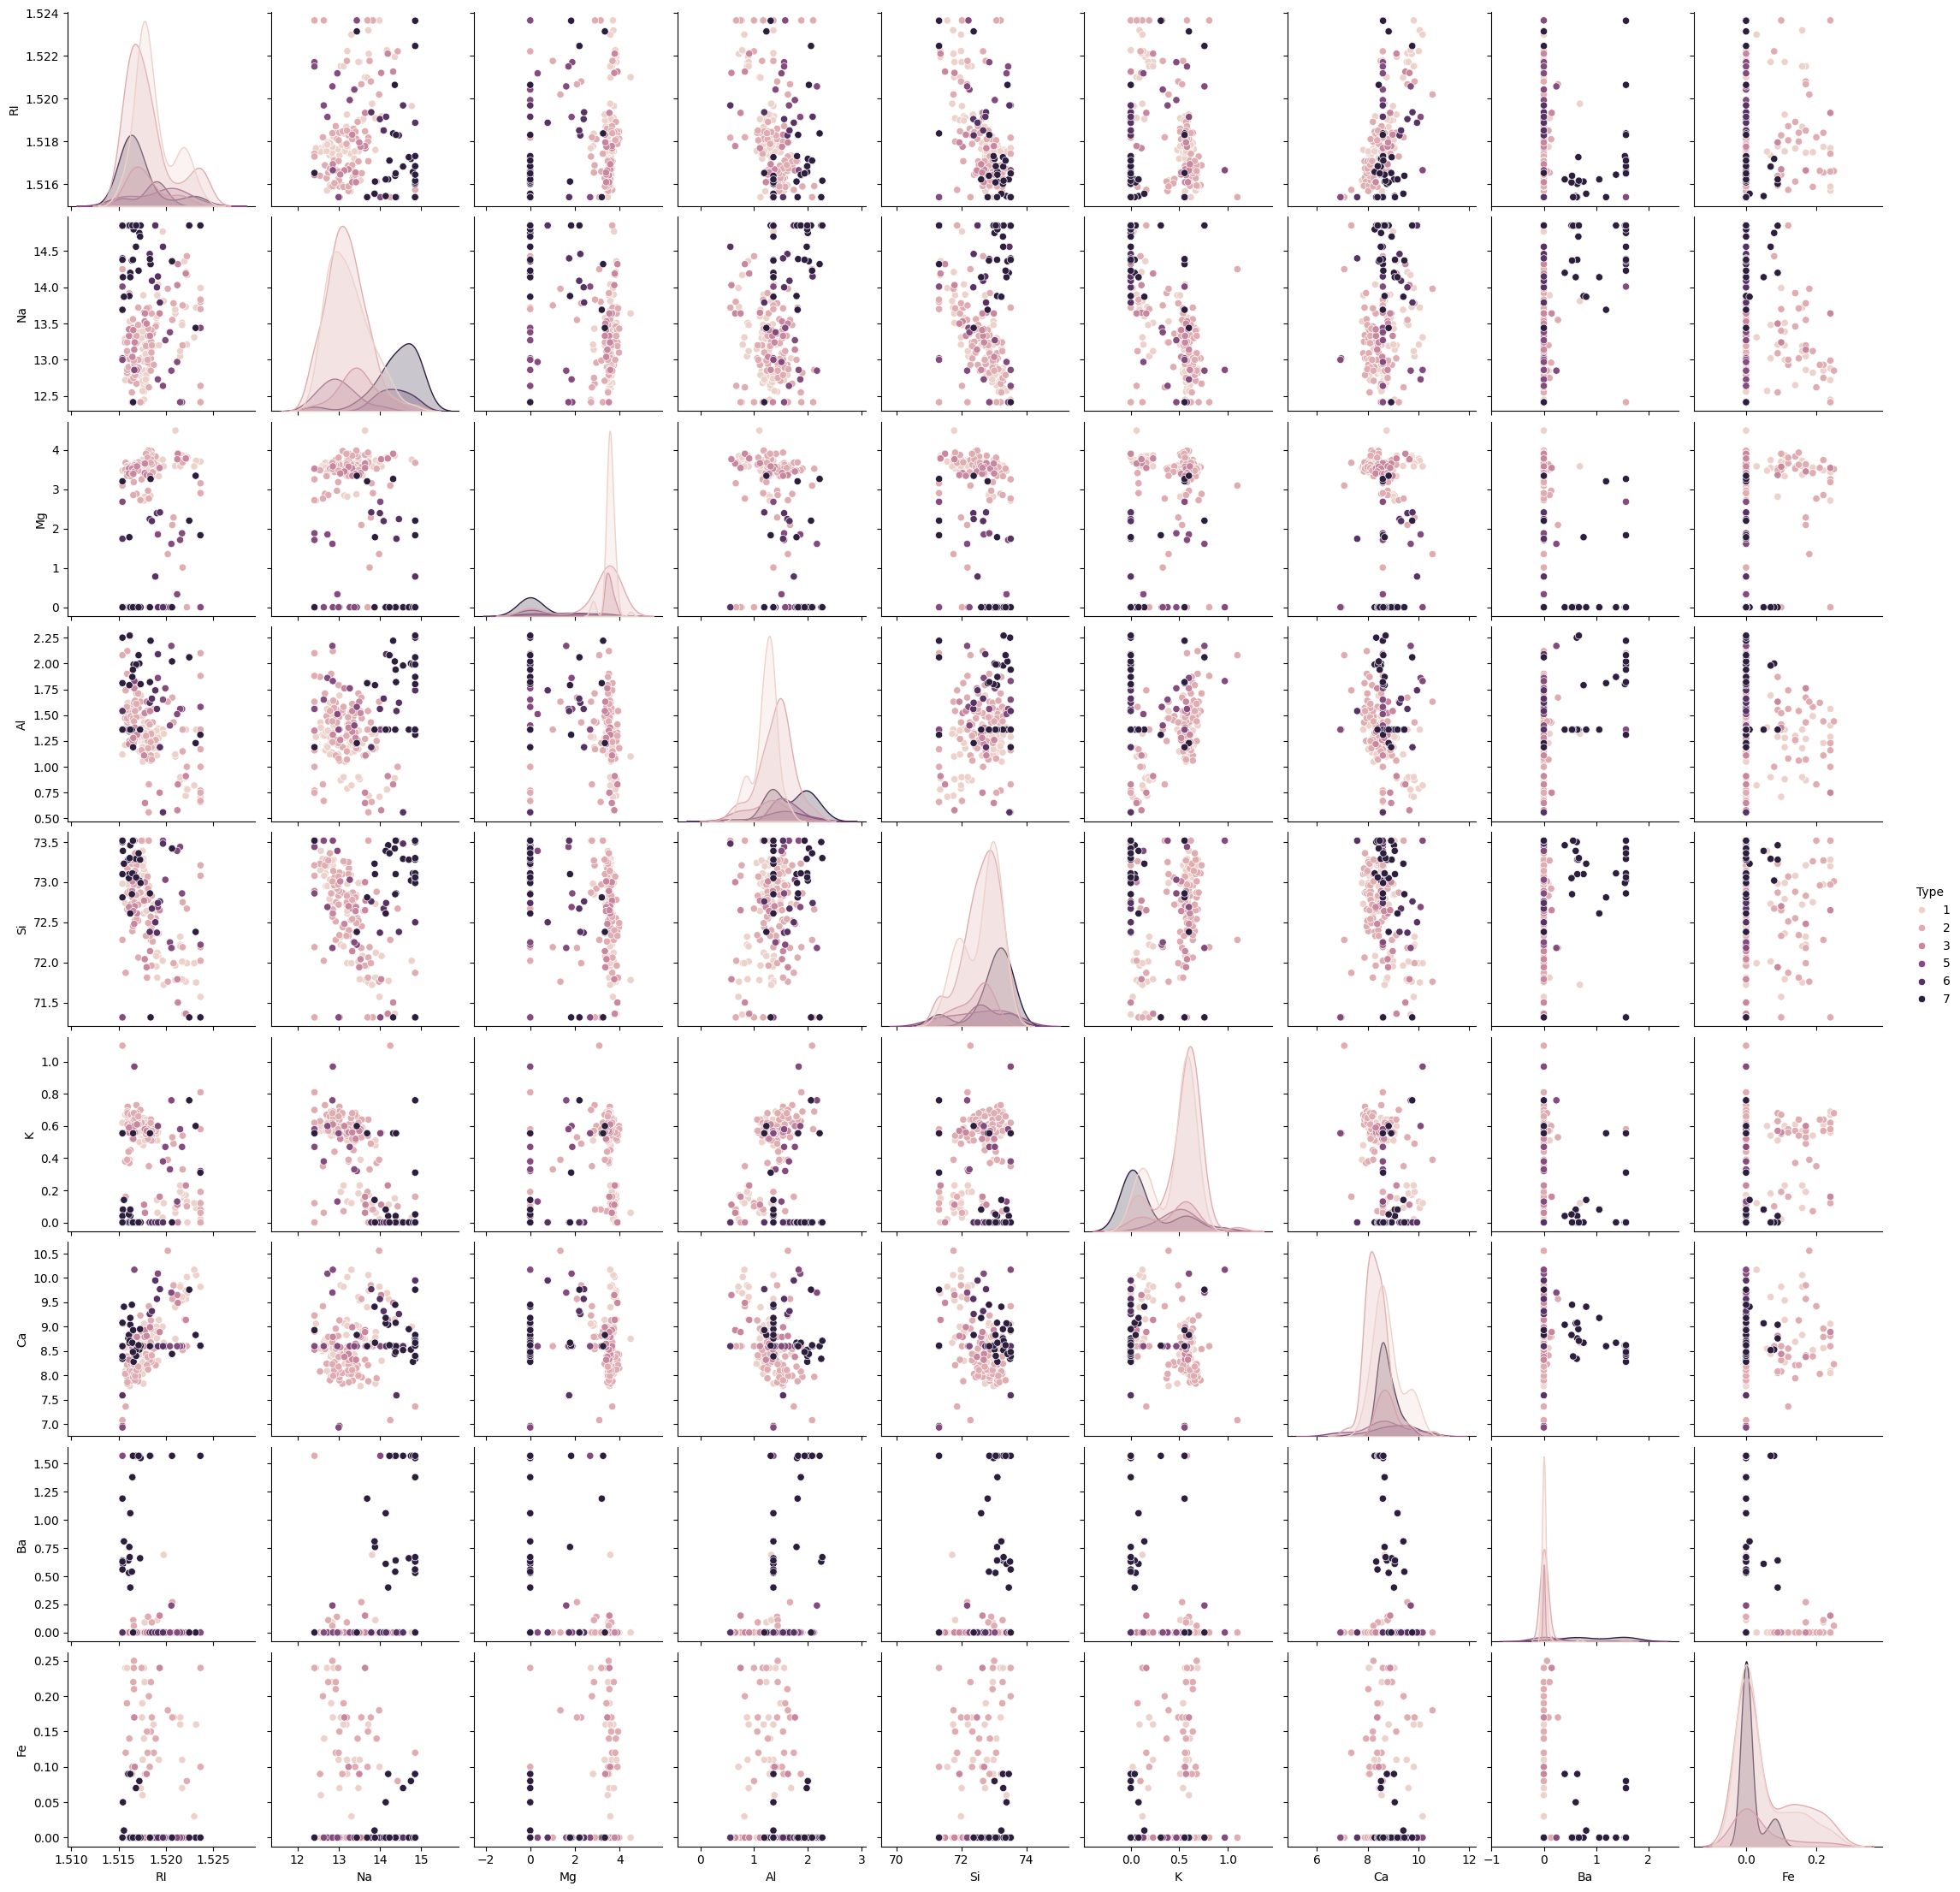

In [ ]:
# Pair plot to visualize relationships
sns.pairplot(glass_df, hue='Type')
plt.show()

**Feature Correlations:**
- RI (Refractive Index) appears to have some correlation with Ca (Calcium) and K (Potassium).
- Other pairs like Na (Sodium) and Mg (Magnesium) show more complex, less linear relationships, indicating potential interactions.

**Clustering Patterns:**
- Different glass types (denoted by different colors) show varying degrees of separation in feature space. For example, Type 7 is somewhat distinct in the Ba (Barium) and Ca feature space, suggesting these features could be useful in classification.
- Some features such as Al (Aluminum) and K (Potassium) show a spread of different types without clear separation, indicating these features may not be as discriminative.

**Distribution of Features:**
- The diagonal density plots highlight the distribution of each feature. For instance, Fe (Iron) is heavily skewed toward lower values, while Na has a more uniform distribution.
- The distributions also show potential multimodality in some features, like Al, indicating the presence of subgroups within the data.


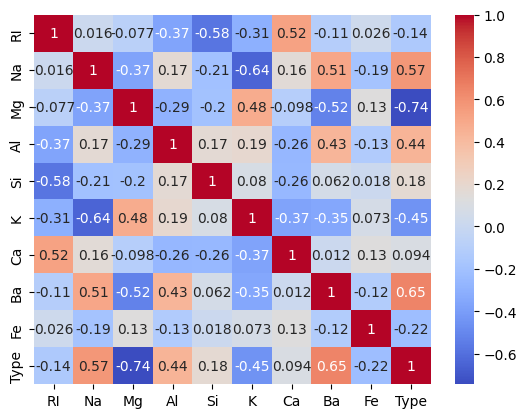

In [ ]:
#correlation
correlation_matrix = glass_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Mg (Magnesium):**
- Correlation: -0.74
- There is a strong negative correlation between "Mg" and "Type," suggesting that as the magnesium content increases, the "Type" tends to decrease.

**Ba (Barium):**
- Correlation: 0.65
- There is a strong positive correlation between "Ba" and "Type," indicating that higher levels of barium are associated with higher values of "Type."

**Na (Sodium):**
- Correlation: 0.57
- There is a moderate positive correlation between "Na" and "Type," suggesting that higher sodium content tends to increase the "Type."

**Al (Aluminum):**
- Correlation: 0.18
- There is a weak positive correlation between "Al" and "Type," indicating a slight tendency for "Type" to increase with aluminum content.

**Ca (Calcium):**
- Correlation: -0.05
- There is almost no correlation between "Ca" and "Type," implying that calcium content has little to no linear relationship with the "Type."

**Si (Silicon):**
- Correlation: 0.13
- There is a weak positive correlation between "Si" and "Type," suggesting a slight increase in "Type" with higher silicon content.

**K (Potassium):**
- Correlation: -0.45
- There is a moderate negative correlation between "K" and "Type," indicating that higher potassium content tends to decrease the "Type."

**Fe (Iron):**
- Correlation: -0.22
- There is a weak negative correlation between "Fe" and "Type," suggesting a slight decrease in "Type" with higher iron content.

**RI (Refractive Index):**
- Correlation: -0.14
- There is a weak negative correlation between "RI" and "Type," implying that a higher refractive index is slightly associated with a lower "Type."

**Step 3: Data Preprocessing**

In [ ]:
# Encoding categorical variables if any (not needed in this dataset as there are no categorical variables)
# Feature Scaling
scaler = StandardScaler()
features = glass_df.drop('Type', axis=1)
features_scaled = scaler.fit_transform(features)

**Step 4: Random Forest Model Implementation**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, glass_df['Type'], test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9069767441860465
Precision: 0.913953488372093
Recall: 0.9069767441860465
F1 Score: 0.9057096036699259

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.91      0.87        11
           2       0.87      0.93      0.90        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.91        43
   macro avg       0.95      0.88      0.90        43
weighted avg       0.91      0.91      0.91        43



- **Accuracy: 0.907 (90.7%):**
The model correctly classified approximately 90.7% of the instances.

- **Precision: 0.914 (91.4%):**
On average, when the model predicted a certain class, it was correct about 91.4% of the time.

- **Recall: 0.907 (90.7%):**
On average, the model correctly identified 90.7% of the actual positive instances.

- **F1 Score: 0.906 (90.6%):**
The harmonic mean of precision and recall, showing a balance between the two metrics. The F1 score of 90.6% indicates that the model is well-balanced in terms of precision and recall.

**Step 5: Bagging and Boosting Methods**

In [ ]:
# Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Precision:", precision_score(y_test, y_pred_bagging, average='weighted'))
print("Bagging Recall:", recall_score(y_test, y_pred_bagging, average='weighted'))
print("Bagging F1 Score:", f1_score(y_test, y_pred_bagging, average='weighted'))
print("\nBagging Classification Report:\n", classification_report(y_test, y_pred_bagging))

Bagging Accuracy: 0.8604651162790697
Bagging Precision: 0.8839793281653745
Bagging Recall: 0.8604651162790697
Bagging F1 Score: 0.8584146359796154

Bagging Classification Report:
               precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.92      0.79      0.85        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.92      0.81      0.85        43
weighted avg       0.88      0.86      0.86        43



- **Bagging Accuracy: 0.860 (86.0%):**
The model correctly classified 86.0% of the instances.

- **Bagging Precision: 0.884 (88.4%):**
On average, when the model predicted a class, it was correct 88.4% of the time.

- **Bagging Recall: 0.860 (86.0%):**
The model correctly identified 86.0% of the actual positive instances across all classes.

- **Bagging F1 Score: 0.858 (85.8%):**
The F1 score, which balances precision and recall, indicates a fairly balanced performance at 85.8%.

###**Bagging Classification Report (Per Class Performance):**

**Class 1:**
- Precision: 0.73
- Recall: 1.00
- F1 Score: 0.85

The model correctly identifies all instances of Class 1 (recall 1.00), but 27% of its predictions for Class 1 are incorrect, lowering precision.

**Class 2:**
- Precision: 0.92
- Recall: 0.79
- F1 Score: 0.85

The model performs well for Class 2, with high precision but a slightly lower recall, indicating that some actual Class 2 instances are missed.

**Class 3:**
- Precision: 1.00
- Recall: 0.67
- F1 Score: 0.80

The model perfectly predicts Class 3 when it does so, but it only captures 67% of actual Class 3 instances.

**Class 5:**
- Precision: 1.00
- Recall: 0.75
- F1 Score: 0.86

The model is very precise when predicting Class 5, but it misses 25% of actual Class 5 instances, resulting in a slightly lower recall.

**Class 6:**
- Precision: 1.00
- Recall: 0.67
- F1 Score: 0.80

The model perfectly predicts Class 6 when it does so, but like Class 3, it only captures 67% of the actual instances.

**Class 7:**
- Precision: 0.89
- Recall: 1.00
- F1 Score: 0.94

The model perfectly identifies all actual instances of Class 7, but it makes some incorrect predictions as well, slightly lowering precision.

In [ ]:
#Boosting
# AdaBoost Classifier
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Predict on the test set
y_pred_boosting = boosting_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Boosting Precision:", precision_score(y_test, y_pred_boosting, average='weighted'))
print("Boosting Recall:", recall_score(y_test, y_pred_boosting, average='weighted'))
print("Boosting F1 Score:", f1_score(y_test, y_pred_boosting, average='weighted'))
print("\nBoosting Classification Report:\n", classification_report(y_test, y_pred_boosting))

Boosting Accuracy: 0.4883720930232558
Boosting Precision: 0.48119015047879615
Boosting Recall: 0.4883720930232558
Boosting F1 Score: 0.42529203729503806

Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.91      0.65        11
           2       0.35      0.43      0.39        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         8

    accuracy                           0.49        43
   macro avg       0.43      0.43      0.38        43
weighted avg       0.48      0.49      0.43        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

- **Accuracy (0.49):** This indicates that the model correctly classified approximately 49% of the samples. In a balanced dataset, this might be a sign of moderate performance, but given the imbalance in class performance (as seen in the report), accuracy might not be the best metric to assess.
- **Precision (0.48):** Precision measures the proportion of true positive predictions out of all positive predictions. The weighted average precision is 0.48, which is close to random guessing for a binary problem but lower in a multi-class context.
- **Recall (0.49):** Recall, or sensitivity, measures the proportion of true positives out of the actual positives. This also sits around 0.49, indicating that the model is detecting just under half of the actual positive instances correctly.
- **F1 Score (0.43):** The F1 score, which balances precision and recall, is 0.43, suggesting that the model struggles to balance between precision and recall across classes.

**Class-Specific Performance:**
- **Class 1:** Precision is 0.50, recall is 0.91, and F1-score is 0.65, meaning the model is better at identifying true positives for this class, though it also makes a fair number of false positives.
- **Class 2:** With a precision of 0.35, recall of 0.43, and an F1-score of 0.39, the model has a relatively weak performance in predicting this class.
- **Class 3, 5, and 7:** These classes show concerning performance. For Class 3 and Class 5, precision, recall, and F1-score are all 0, indicating the model failed to identify any true positives. Class 7, although it has a perfect precision of 1.0, has a recall of only 0.25, which means it is likely overfitting to certain features and missing many true positives.
- **Class 6:** This class has a high precision and recall (0.75 and 1.00, respectively), with a high F1-score of 0.86, indicating strong performance for this specific class.

##**Results:**

**Accuracy:**
- **Boosting: 0.488**
- **Bagging: 0.860**
Insight: Bagging significantly outperforms Boosting in terms of accuracy, indicating that the Bagging method is better at correctly classifying a higher proportion of instances.

**Precision:**
- **Boosting: 0.481**
- **Bagging: 0.884**
Insight: Bagging also has a much higher precision, meaning that it makes fewer false positive errors compared to Boosting.

**Recall:**
- **Boosting: 0.488**
- **Bagging: 0.860**
Insight: Bagging again performs better, indicating that it correctly identifies a larger portion of the true positive instances.

**F1 Score:**
- **Boosting: 0.425**
- **Bagging: 0.858**
Insight: The F1 score, which balances precision and recall, is substantially higher for Bagging, demonstrating its overall superior performance in your specific classification task.

####**Conclusion:**
The Bagging method, specifically the model used, is performing significantly better across all key metrics compared to the Boosting model. This suggests that Bagging is more suitable for the glass dataset.

##**Additional Notes:**

###**1. Explain Bagging and Boosting methods. How is it different from each other.**


**Bagging and Boosting** are both ensemble learning techniques that combine the predictions of multiple models to produce a more accurate and robust overall model.

###**Bagging (Bootstrap Aggregating):**
Concept: Bagging involves creating multiple versions of a model by training each on a different subset of the training data. These subsets are generated by randomly sampling the data with replacement (i.e., bootstrap sampling).
Each model is trained independently of the others. The final prediction is made by averaging the predictions (for regression) or by majority voting (for classification) from all the models.

**Process:**
- Bootstrap Sampling: Multiple subsets of the original dataset are created by randomly sampling with replacement.
- Model Training: A base model (like a decision tree) is trained on each subset independently.
- Aggregation: The predictions from all the trained models are aggregated. For classification, this is typically done by majority voting, and for regression, by averaging.

**Key Features:**

- Reduces Variance: Bagging helps reduce variance by averaging out the errors of individual models, making the overall model less sensitive to overfitting.
- Parallel Training: Since each model is trained independently, bagging can be parallelized, which is computationally efficient.
- Common Algorithms: Random Forest is the most well-known example of a bagging algorithm.

###**Boosting:**

Concept: Boosting is a sequential ensemble technique where models are trained one after the other, with each new model trying to correct the errors made by the previous models.
Unlike bagging, where models are independent, boosting models are interdependent.

**Process:**
- Model Training: The first model is trained on the original dataset. The performance of this model is then evaluated.
- Error Adjustment: The second model is trained by giving more focus (higher weights) to the instances that were incorrectly classified by the first model. This process continues, with each subsequent model focusing more on the errors of the previous models.
- Aggregation: The final prediction is made by combining the predictions of all models, typically through a weighted sum.

**Key Features:**
- Reduces Bias and Variance: Boosting can reduce both bias and variance, leading to strong performance, especially on complex datasets.
- Sequential Training: Boosting models are trained sequentially, which makes the process more computationally intensive and harder to parallelize.
- Common Algorithms: AdaBoost, Gradient Boosting (including XGBoost, LightGBM, CatBoost) are popular boosting algorithms.

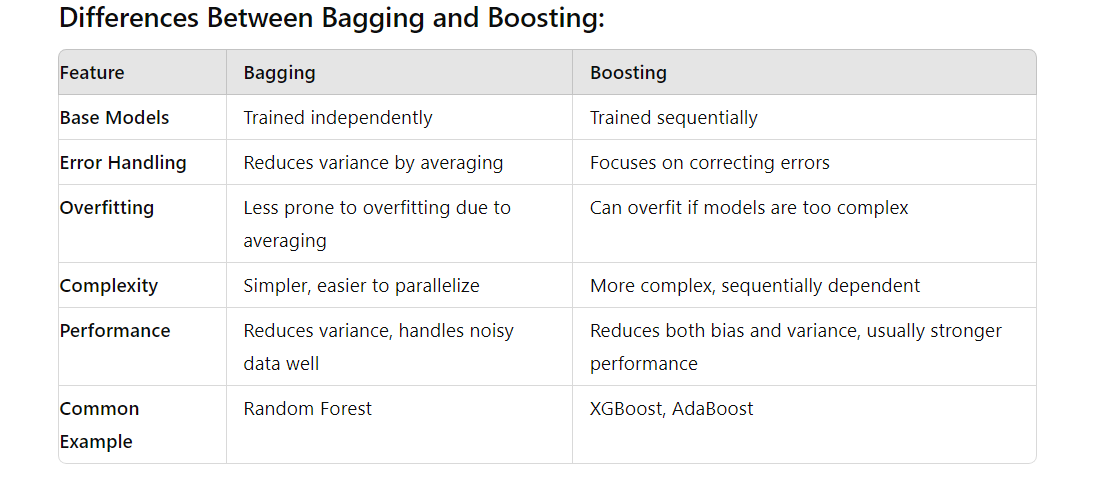

**When to Use Which:**
- **Bagging:** Ideal when you want to reduce the variance of a high-variance model (e.g., decision trees). It works well when you have a model that overfits on your data but generally performs well on average.
- **Boosting:** Best used when your model is underperforming (i.e., high bias). Boosting can help correct the model's mistakes and improve its accuracy, often resulting in better performance on complex tasks.

###**2. Explain how to handle imbalance in the data.**

Handling imbalanced data is crucial in many machine learning tasks, especially when the minority class is of particular importance (e.g., fraud detection, medical diagnosis). An imbalanced dataset can lead to biased models that perform well on the majority class but poorly on the minority class. Here are several strategies to handle imbalance in data:

####**1. Resampling Techniques**

**a. Oversampling the Minority Class:**
Description: Increase the number of instances in the minority class by randomly duplicating examples or by generating synthetic examples.

**Methods:**
- **Random Oversampling:** Randomly duplicates minority class examples.
- **SMOTE (Synthetic Minority Over-sampling Technique):** Creates synthetic examples by interpolating between existing minority class examples.
- **ADASYN (Adaptive Synthetic Sampling):** A variant of SMOTE that focuses on creating synthetic examples for difficult-to-classify samples.

- **Pros:** Balances the dataset without losing information.
- **Cons:** May lead to overfitting, as it duplicates data points.

**b. Undersampling the Majority Class:**
Description: Reduce the number of instances in the majority class by randomly removing examples.

**Methods:**
- **Random Undersampling:** Randomly removes majority class examples to balance the dataset.
- **Tomek Links:** Removes examples from the majority class that are close to minority class examples.
- **Cluster-based Undersampling:** Clusters the majority class and undersamples each cluster, preserving the distribution.

- **Pros:** Reduces training time and model complexity.
- **Cons:** Risk of losing important information from the majority class.

**c. Hybrid Methods:**
- Combination of Oversampling and Undersampling: Balancing the classes by applying both techniques. For instance, using SMOTE to oversample the minority class and then applying Tomek Links to clean the data.
- **Pros:** Can provide a more balanced approach without the extremes of either method alone.
- **Cons:** Requires careful tuning and validation to avoid overfitting or underfitting.

####**2. Algorithm-Level Techniques**

**a. Adjusting Class Weights:**
Description: Many algorithms allow you to assign different weights to different classes. This tells the model to pay more attention to the minority class.

**Implementation:**
- **In Scikit-learn:** Use the class_weight='balanced' parameter in algorithms like SVM, Logistic Regression, or Decision Trees.
- **For Gradient Boosting:** Manually set the scale_pos_weight parameter (in XGBoost) or class_weight in LightGBM.
- **Pros:** Helps the model focus more on the minority class without changing the dataset.
- **Cons:** Requires careful tuning of weights, especially for highly imbalanced datasets.

**b. Cost-Sensitive Learning:**
Description: Similar to class weighting, but the model is trained to minimize a cost function that penalizes misclassification of the minority class more heavily.
**Implementation:** Customize the loss function to incorporate different costs for different classes.
- **Pros:** Provides a direct way to address imbalance during model training.
- **Cons:** Can be more complex to implement and tune.

####**3. Ensemble Methods**
**a. Bagging and Boosting with Class Weights:**
Description: Use ensemble methods like Random Forest or Gradient Boosting that allow class weighting or bootstrapping with resampling.
- **Pros:** Naturally reduce overfitting and improve performance on imbalanced data.
- **Cons:** Computationally expensive and may require tuning of hyperparameters.

**b. Balanced Random Forest or EasyEnsemble:**

- **Balanced Random Forest:** A variant of Random Forest where each tree is trained on a balanced bootstrapped subset.
- **EasyEnsemble:** A technique that creates multiple balanced datasets using undersampling and trains an ensemble of models on these subsets.
- **Pros:** Maintains diversity in the ensemble while addressing imbalance.
- **Cons:** Can be complex to implement and may increase training time.

####**4. Evaluation Metrics**
**a. Use Metrics that Reflect the Imbalance:**
- **Accuracy** is often misleading in imbalanced datasets. Instead, use:
- **Precision and Recall:** Precision measures the proportion of true positives out of predicted positives, and recall measures the proportion of true positives out of actual positives.
- **F1-Score:** Harmonic mean of precision and recall, useful when you need a balance between precision and recall.
- **ROC-AUC (Area Under the ROC Curve):** Evaluates the trade-off between true positive rate and false positive rate across different thresholds.
- **PR-AUC (Area Under the Precision-Recall Curve):** Especially useful in highly imbalanced datasets, focusing on the minority class.
- **Pros:** Provides a more accurate reflection of model performance on imbalanced data.
- **Cons:** Requires understanding of when each metric is appropriate.


####**5. Data Augmentation**
- **a. Augment the Minority Class:**
Description: For image, text, or time-series data, use data augmentation techniques to create new examples in the minority class.
Methods:
- Rotate, flip, or alter images; synonym replacement in text data; add noise or jitter in time-series data.
- **Pros:** Expands the training data, potentially leading to better generalization.
- **Cons:** May introduce noise or irrelevant variations if not done carefully.

####**6. Anomaly Detection Techniques**
- **a. Use Anomaly Detection for Minority Classes:**
Description: Treat the minority class as an anomaly and use anomaly detection methods like One-Class SVM, Isolation Forest, or Autoencoders.
- **Pros:** Particularly useful when the minority class is extremely rare and distinct.
- **Cons:** May require domain-specific tuning and is less effective if the minority class is not truly anomalous.

####**7. Change the Decision Threshold**
- **a. Adjust the Classification Threshold:**
Description: By default, models often classify a sample as positive if the predicted probability is above 0.5. You can lower this threshold for the minority class to improve recall.
Implementation: Manually set the threshold that balances precision and recall according to your business needs.
- **Pros:** Simple to implement and adjust.
- **Cons:** Needs careful tuning and validation to avoid introducing bias.









